## Linear regression with interaction effects

Estimating a linear regression model with annual income in USD (**earn**) as the response variable. Investigating whether the relationship between income **earn** and level of education **education** differs depending on gender **male** or not.

### Data Understanding
The following must be in a regression model for this task:  

Y (response variable) = **earn** (income in USD)

X1 = **education** (level of education, number of years)

X2 = **male** (gender, male or female)

X3 = Interaction term between **education** and **male** (education × male)

Dataset Source: [https://github.com/avehtari/ROS-Examples/blob/master/Earnings/data/earnings.csv]

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [2]:
dataset_orig = pd.read_csv("Datasets/earnings.csv")

In [3]:
dataset_orig.head()

,height,weight,male,earn,earnk,ethnicity,education,mother_education,father_education,walk,exercise,smokenow,tense,angry,age
0,74,210.0,1,50000.0,50.0,White,16.0,16.0,16.0,3,3,2.0,0.0,0.0,45
1,66,125.0,0,60000.0,60.0,White,16.0,16.0,16.0,6,5,1.0,0.0,0.0,58
2,64,126.0,0,30000.0,30.0,White,16.0,16.0,16.0,8,1,2.0,1.0,1.0,29
3,65,200.0,0,25000.0,25.0,White,17.0,17.0,NaN,8,1,2.0,0.0,0.0,57
4,63,110.0,0,50000.0,50.0,Other,16.0,16.0,16.0,5,6,2.0,0.0,0.0,91


**earn** - the person's annual income in USD. Retrieved from registry.

**height** - height of the person in inches. Self-reported.

**weight** - weight of the person in pounds. Self-reported.

**male** - dummy variable with values ​​1 (male) and 0 (female). Retrieved from registry.

**ethnicity** - the person's ethnicity, with Black, Hispanic, Other, and White categories. Retrieved from registry.

**education** - number of years of education. Retrieved from registry.

**age** - age. Retrieved from registry

In [4]:
dataset = dataset_orig[['earn', 'height', 'weight', 'male', 'ethnicity', 'education', 'age']]

In [5]:
dataset.head()

,earn,height,weight,male,ethnicity,education,age
0,50000.0,74,210.0,1,White,16.0,45
1,60000.0,66,125.0,0,White,16.0,58
2,30000.0,64,126.0,0,White,16.0,29
3,25000.0,65,200.0,0,White,17.0,57
4,50000.0,63,110.0,0,Other,16.0,91


In [6]:
dataset.describe()

,earn,height,weight,male,education,age
count,1816.000000,1816.000000,1789.000000,1816.000000,1814.000000,1816.000000
mean,21147.296256,66.568833,156.305198,0.371696,13.235391,42.934471
std,22531.765123,3.831822,34.617059,0.483391,2.556638,17.161672
min,0.000000,57.000000,80.000000,0.000000,2.000000,18.000000
25%,6000.000000,64.000000,130.000000,0.000000,12.000000,29.000000
50%,16000.000000,66.000000,150.000000,0.000000,12.000000,39.000000
75%,27000.000000,69.250000,180.000000,1.000000,15.000000,56.000000
max,400000.000000,82.000000,342.000000,1.000000,18.000000,91.000000


In [7]:
dataset.shape

(1816, 7)

In [ ]:
# Convert height from inches to cm
dataset['height_cm'] = dataset['height'] * 2.54

# Convert weight from pounds to kg
dataset['weight_kg'] = dataset['weight'] * 0.453592

### Descriptive Analysis
#### Checking Missing Values

In [9]:
dataset.isna().sum()

earn          0
height        0
weight       27
male          0
ethnicity     0
education     2
age           0
height_cm     0
weight_kg    27
dtype: int64

In [10]:
dataset = dataset.dropna()

In [11]:
dataset.isna().sum()

earn         0
height       0
weight       0
male         0
ethnicity    0
education    0
age          0
height_cm    0
weight_kg    0
dtype: int64

In [12]:
dataset = dataset[dataset['earn'] > 0.0]

In [13]:
dataset.shape

(1605, 9)

#### EARN

In [14]:
dataset['earn'].describe()

count      1605.000000
mean      23657.003115
std       22671.288087
min         200.000000
25%       10000.000000
50%       19000.000000
75%       30000.000000
max      400000.000000
Name: earn, dtype: float64

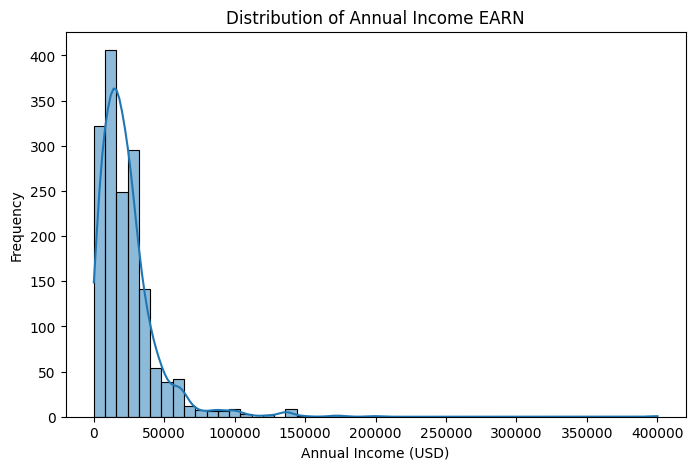

In [15]:
plt.figure(figsize=(8,5))
sns.histplot(data=dataset['earn'], bins=50, kde=True)
plt.title("Distribution of Annual Income EARN")
plt.xlabel('Annual Income (USD)')
plt.ylabel('Frequency')
plt.show()

> It is very right skewed! There seems to be many outliers or incomes that are unusual.

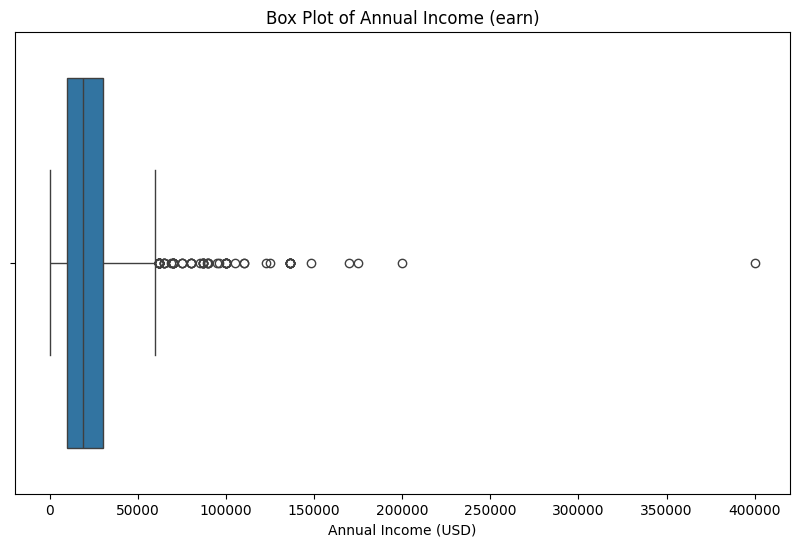

In [16]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=dataset['earn'])
plt.title('Box Plot of Annual Income (earn)')
plt.xlabel('Annual Income (USD)')
plt.show()

Outliers start around 60 or 70000 USD, It would be better to remove the outliers here!  
> Let's remove the outliers of EARN!

In [17]:
Q1 = dataset['earn'].quantile(0.25)
Q3 = dataset['earn'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
dataset = dataset[(dataset['earn'] >= lower_bound) & (dataset['earn'] <= upper_bound)]

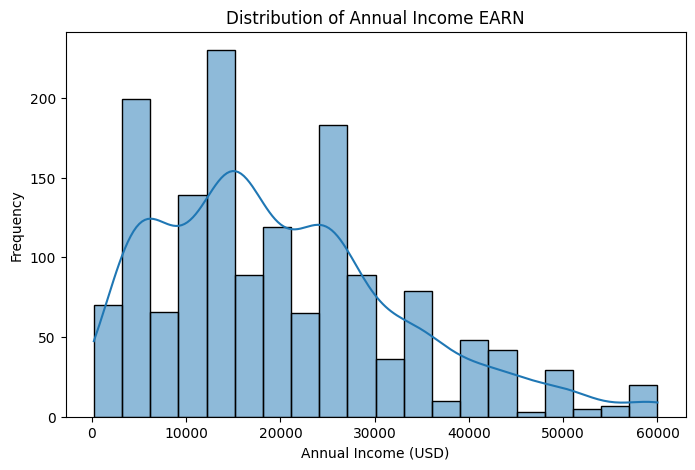

In [18]:
plt.figure(figsize=(8,5))
sns.histplot(data=dataset['earn'], bins=20, kde=True)
plt.title("Distribution of Annual Income EARN")
plt.xlabel('Annual Income (USD)')
plt.ylabel('Frequency')
plt.show()

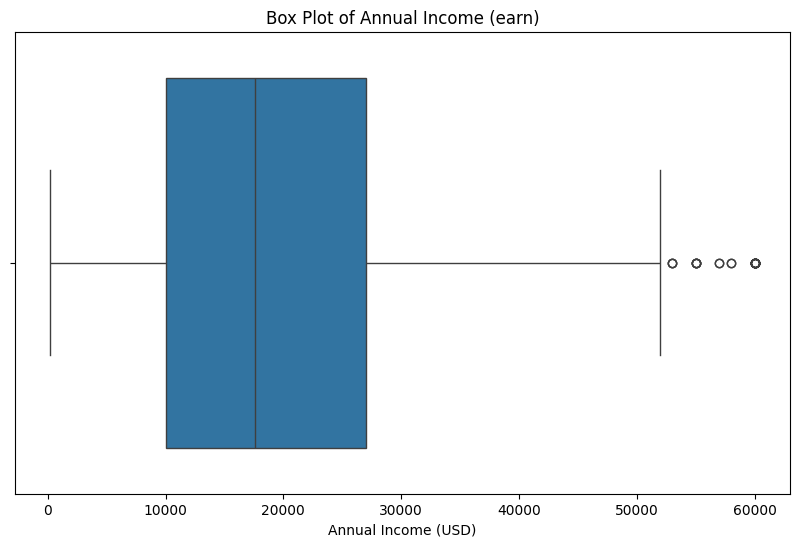

In [19]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=dataset['earn'])
plt.title('Box Plot of Annual Income (earn)')
plt.xlabel('Annual Income (USD)')
plt.show()

#### HEIGHT

In [20]:
dataset['height_cm'].describe()

count    1528.000000
mean      169.428639
std         9.802375
min       144.780000
25%       162.560000
50%       167.640000
75%       177.800000
max       208.280000
Name: height_cm, dtype: float64

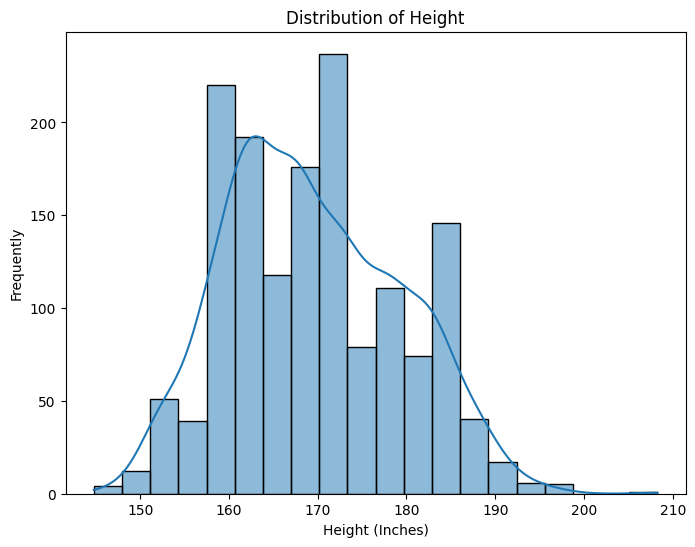

In [21]:
plt.figure(figsize=(8,6))
sns.histplot(data=dataset['height_cm'], bins=20, kde=True)
plt.title("Distribution of Height")
plt.xlabel('Height (Inches)')
plt.ylabel('Frequently')
plt.show()

> The graph shows a (similar to) normal distributed shape!

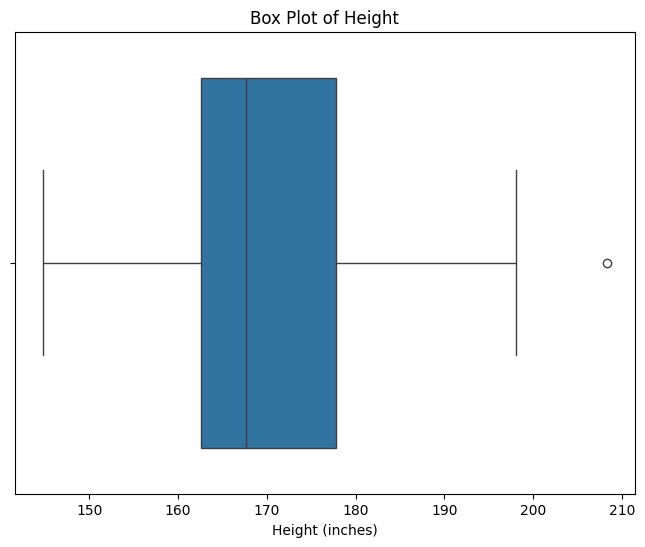

In [22]:
plt.figure(figsize=(8,6))
sns.boxplot(x=dataset['height_cm'])
plt.title('Box Plot of Height')
plt.xlabel('Height (inches)')
plt.show()

#### WEIGHT

In [23]:
dataset['weight_kg'].describe()

count    1528.000000
mean       71.043550
std        15.586111
min        36.287360
25%        58.966960
50%        68.038800
75%        81.646560
max       155.128464
Name: weight_kg, dtype: float64

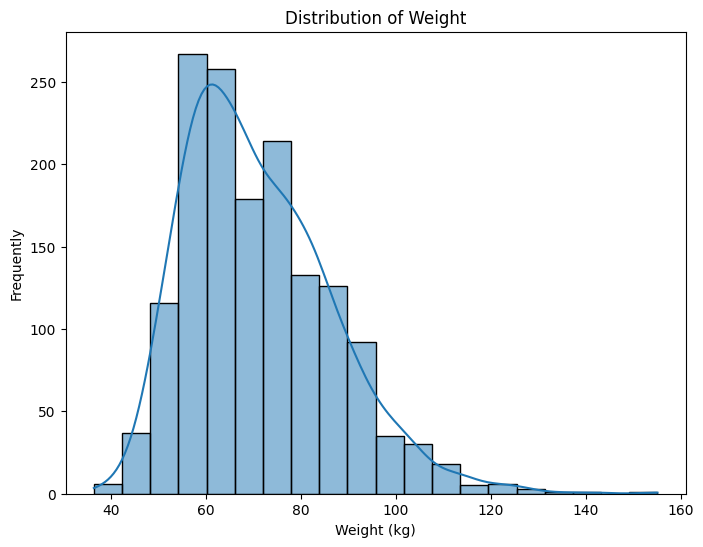

In [24]:
plt.figure(figsize=(8,6))
sns.histplot(data=dataset['weight_kg'], bins=20, kde=True)
plt.title("Distribution of Weight")
plt.xlabel('Weight (kg)')
plt.ylabel('Frequently')
plt.show()

A little bit right skewed, but we let it be for now!

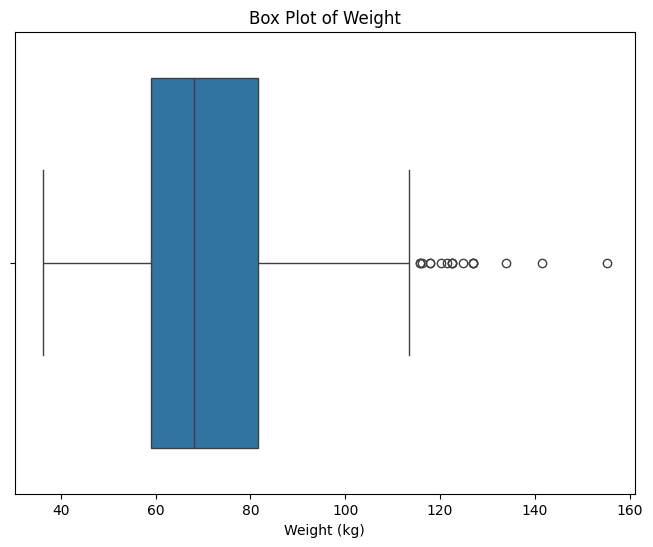

In [25]:
plt.figure(figsize=(8,6))
sns.boxplot(x=dataset['weight_kg'])
plt.title('Box Plot of Weight')
plt.xlabel('Weight (kg)')
plt.show()

> There are some outliers, but we let them be for now as they are not too many.

#### AGE

In [26]:
dataset['age'].describe()

count    1528.000000
mean       42.915576
std        17.467719
min        18.000000
25%        29.000000
50%        39.000000
75%        56.000000
max        91.000000
Name: age, dtype: float64

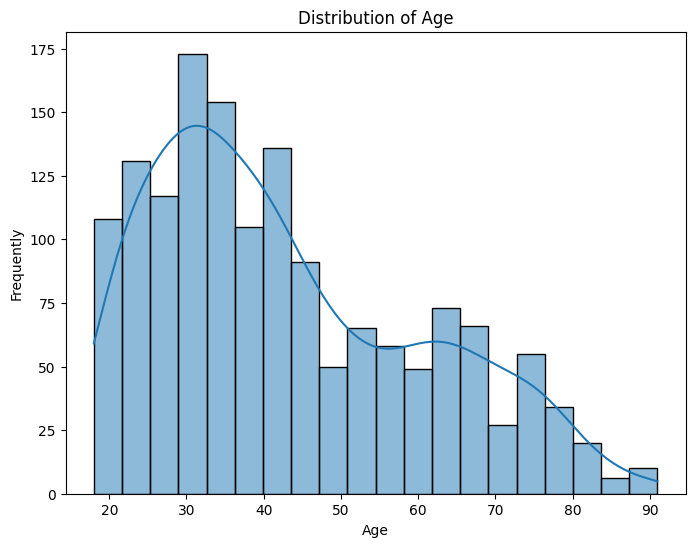

In [27]:
plt.figure(figsize=(8,6))
sns.histplot(data=dataset['age'], bins=20, kde=True)
plt.title("Distribution of Age")
plt.xlabel('Age')
plt.ylabel('Frequently')
plt.show()

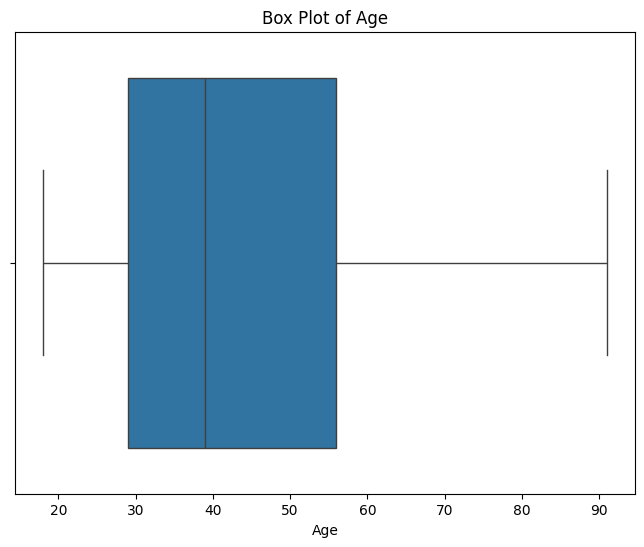

In [28]:
plt.figure(figsize=(8,6))
sns.boxplot(x=dataset['age'])
plt.title('Box Plot of Age')
plt.xlabel('Age')
plt.show()

#### MALE

In [29]:
dataset['male'].value_counts()
# 1 male
# 0 female

male
0    927
1    601
Name: count, dtype: int64

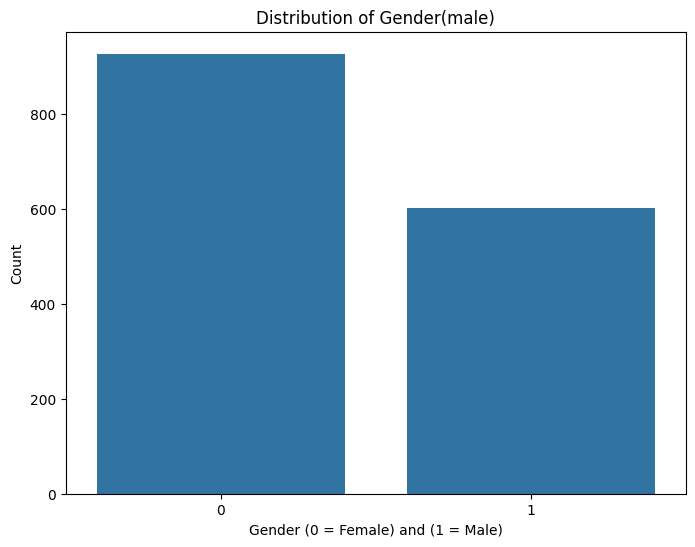

In [30]:
plt.figure(figsize=(8, 6))
sns.countplot(x=dataset['male'])
plt.title('Distribution of Gender(male)')
plt.xlabel("Gender (0 = Female) and (1 = Male)")
plt.ylabel('Count')
plt.show()

#### ETHNICITY

In [31]:
dataset['ethnicity'].value_counts()

ethnicity
White       1242
Black        163
Hispanic      92
Other         31
Name: count, dtype: int64

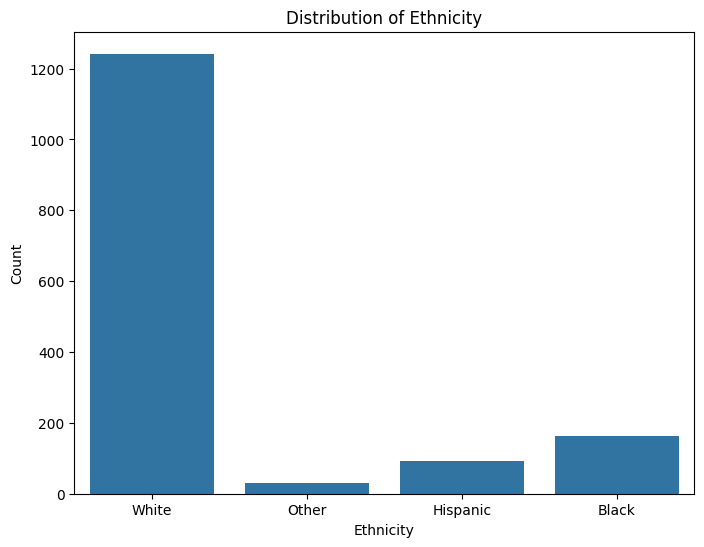

In [32]:
plt.figure(figsize=(8, 6))
sns.countplot(x=dataset['ethnicity'])
plt.title('Distribution of Ethnicity')
plt.xlabel("Ethnicity")
plt.ylabel('Count')
plt.show()

#### Height vs. Annual Income

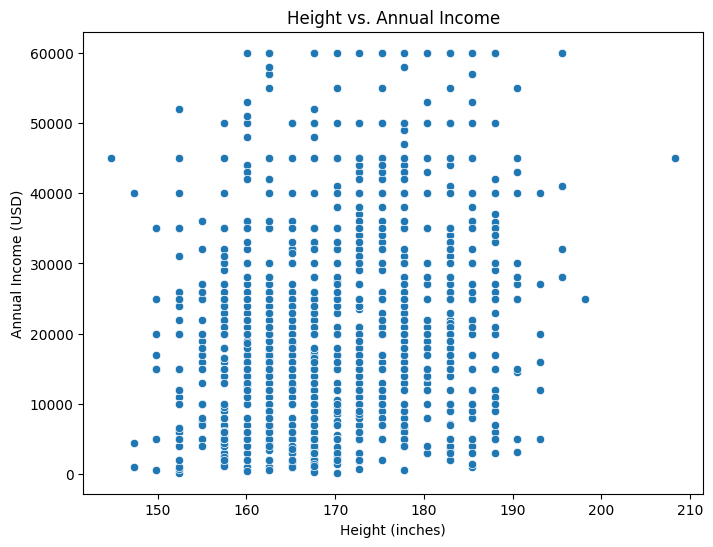

In [33]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=dataset['height_cm'], y=dataset['earn'])
plt.title('Height vs. Annual Income')
plt.xlabel('Height (inches)')
plt.ylabel('Annual Income (USD)')
plt.show()

In [34]:
correlation = dataset['height_cm'].corr(dataset['earn'])
print(f'Correlation between height (cm) and earn: {correlation}')
# The correlation is slightly stronger than weight but still weak and positive.

Correlation between height (cm) and earn: 0.24236717505127423


#### Weight vs Annual Income

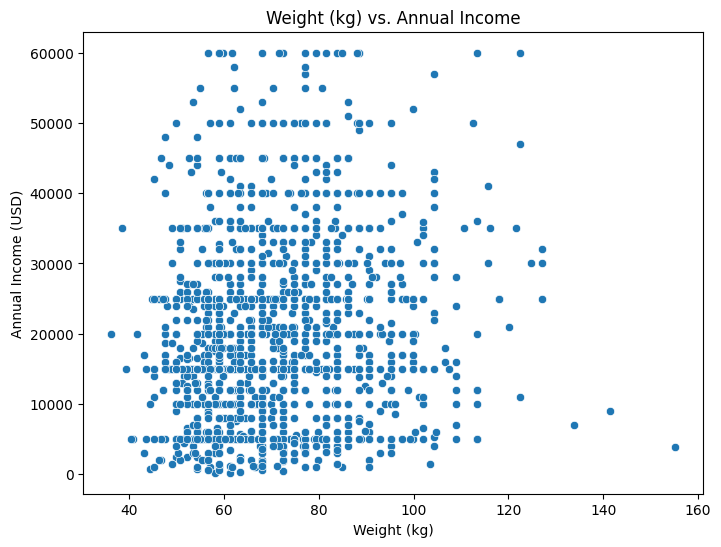

In [35]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=dataset['weight_kg'], y=dataset['earn'])
plt.title('Weight (kg) vs. Annual Income')
plt.xlabel('Weight (kg)')
plt.ylabel('Annual Income (USD)')
plt.show()

In [36]:
correlation = dataset['weight_kg'].corr(dataset['earn'])
print(f'Correlation between weight (kg) and earn: {correlation}')
# The correlation is very weak and positive, indicating a very slight positive relationship.

Correlation between weight (kg) and earn: 0.14128820251438298


> Weak Relationships: Both weight and height show weak correlations with annual income, implying that they may not be significant predictors of income in your regression model.

#### Education vs Annual Income
Education is **categorical** in nature!

In [37]:
correlation = dataset['education'].corr(dataset['earn'])
print(f'Correlation between education and earn: {correlation}')

Correlation between education and earn: 0.3329077871285469


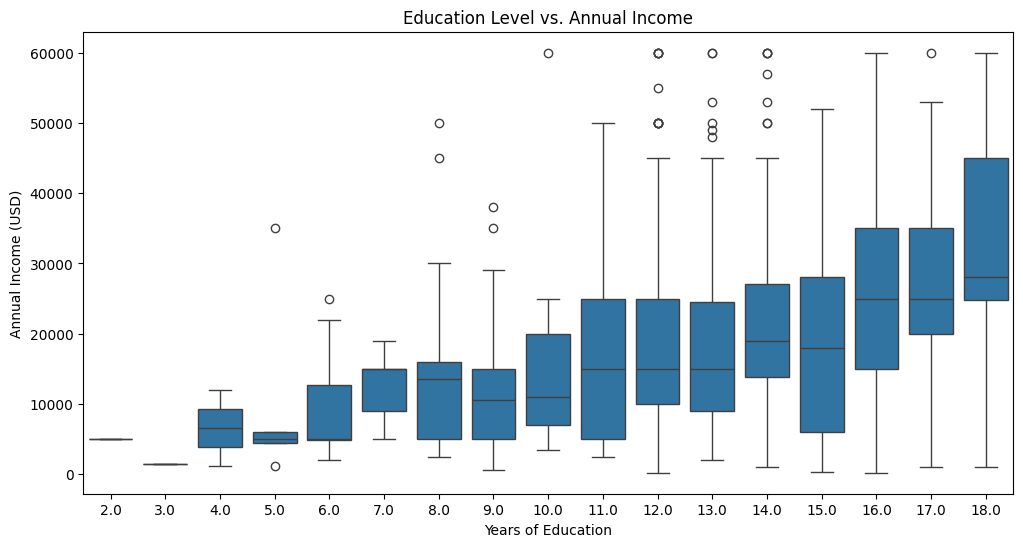

In [38]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=dataset['education'], y=dataset['earn'])
plt.title('Education Level vs. Annual Income')
plt.xlabel('Years of Education')
plt.ylabel('Annual Income (USD)')
plt.show()

> People with 18 years of education has the highest mean of income in USD!

#### Gender vs. Annual Income

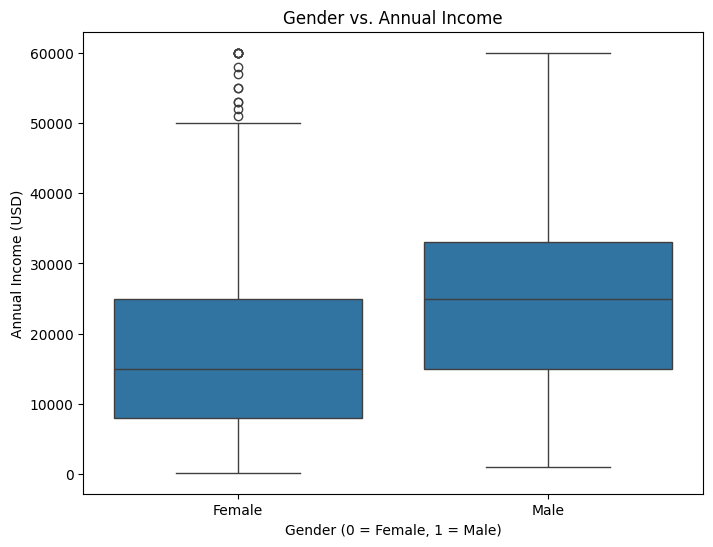

In [39]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=dataset['male'], y=dataset['earn'])
plt.title('Gender vs. Annual Income')
plt.xlabel('Gender (0 = Female, 1 = Male)')
plt.ylabel('Annual Income (USD)')
plt.xticks(ticks=[0, 1], labels=['Female', 'Male'])
plt.show()

> males has higher median than the females! (Males earn more)

In [40]:
summary_stats = dataset.groupby('male')['earn'].describe()
print(summary_stats)

      count          mean           std     min      25%      50%      75%  \
male                                                                         
0     927.0  17368.386192  11714.164728   200.0   8000.0  15000.0  25000.0   
1     601.0  24354.402662  13673.809107  1000.0  15000.0  25000.0  33000.0   

          max  
male           
0     60000.0  
1     60000.0  


### Population model

**earn**: $b_0 + b_1 * height_{cm} + b_2 * age + b_3 * education + b_4 * male + b_5 * (education * male)$

Where:

earn - is the response variable (annual income).

height_cm and age are numerical predictors.

education and male are categorical predictors.

education × male is the interaction term.

In [41]:
# Let's filter out the rows where the education years are below 9:
dataset = dataset[dataset['education'] >= 9]

In [42]:
# Mean-center the numerical values
numerical_features = ['height_cm', 'age', 'education']
for feature in numerical_features:
    dataset[feature] = dataset[feature] - dataset[feature].mean()

In [43]:
# Add the interaction term to the dataset
dataset['education_male_interaction'] = dataset['education'] * dataset['male']

# Define the model
model = ols('earn ~ height_cm + age + education + male + education_male_interaction', data=dataset).fit()

In [44]:
# Print the summary of the regression model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   earn   R-squared:                       0.197
Model:                            OLS   Adj. R-squared:                  0.194
Method:                 Least Squares   F-statistic:                     71.00
Date:                Tue, 10 Dec 2024   Prob (F-statistic):           1.45e-66
Time:                        09:02:32   Log-Likelihood:                -15687.
No. Observations:                1455   AIC:                         3.139e+04
Df Residuals:                    1449   BIC:                         3.142e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

### Residual Analysis

In [45]:
residuals = model.resid
fitted_values = model.fittedvalues

#### Assumption 1: Normality of Residuals

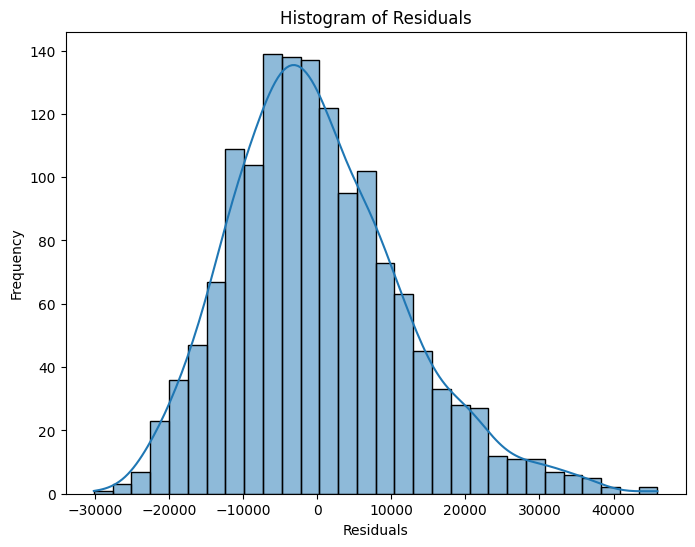

In [48]:
plt.figure(figsize=(8, 6))
sns.histplot(residuals, bins=30, kde=True)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

#### Assumption 2: Homoscedacity (constant variance) of Residuals

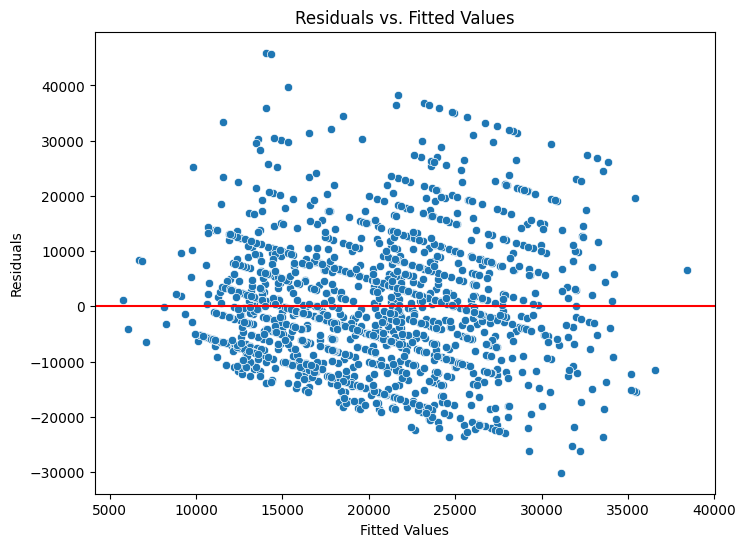

In [50]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=fitted_values, y=residuals)
plt.axhline(y=0, color='r')
plt.title('Residuals vs. Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

#### Assumption 3: Independence of Residuals

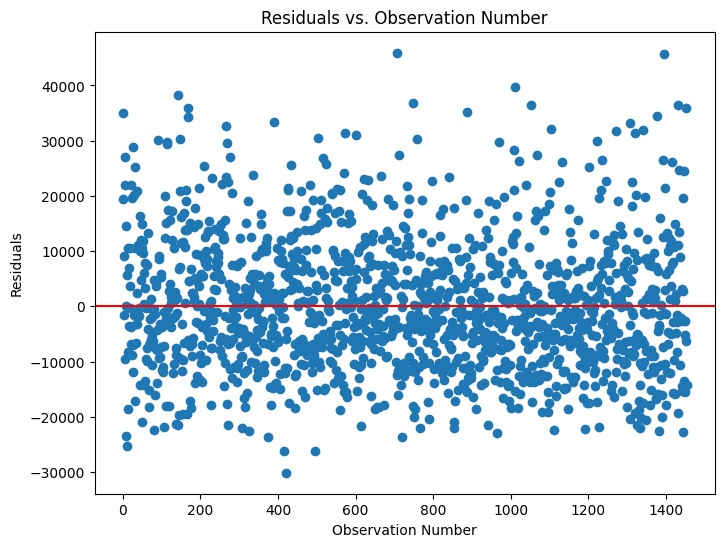

In [52]:
plt.figure(figsize=(8, 6))
plt.scatter(range(len(residuals)), residuals)
plt.axhline(y=0, color='r')
plt.title('Residuals vs. Observation Number')
plt.xlabel('Observation Number')
plt.ylabel('Residuals')
plt.show()

### Interpreting the coefficients

                            Estimate

Intercept                    1.82e+04    
height_cm                    112.0467    
age                          117.7292    
education                   2063.6540    
male                        5916.8900    
education_male_interaction  -443.3815    

**education**: For females, each additional year of education increases annual income by approximately $2063.65, holding height, and age constant.

**age**: Being male is associated with an increase in annual income of approximately $5916.89 compared to females, holding education, and height constant.

**education_male_interaction**: For males, each additional year of education is associated with a decrease in the income increase by approximately $443.38 compared to females, holding height, age, and gender constant.

### Task:
Formulate a formal hypothesis test that allows you to answer the question of whether the relationship between earn and education_c differs between men and women.

**Population Model**:  
**earn**: $b_0 + b_1 * height_{cm} + b_2 * age + b_3 * education + b_4 * male + b_5 * (education * male)$

**Hypothesis test:**  

**Null Hypothesis** ($H_0$): $b_5 = 0$  
**Alternative Hypothesis** ($H_1$): $b_5 \neq 0$

In [53]:
coef = model.params['education_male_interaction'] 
std_err = model.bse['education_male_interaction']

The **T-statistic** formula: $$\text{T statistic} = \frac{\text{coef}}{\text{std error}}$$

In [54]:
t_stat = coef / std_err
print(f"T-statistic: {t_stat}")

T-statistic: -1.5410291296356209


Let's say alpha is 5%.

In [55]:
df = model.df_resid
print(f'Degrees of Freedom: {df}')

Degrees of Freedom: 1449.0


In [56]:
from scipy.stats import t

# Set significance level
alpha = 0.05

# Calculate critical value
t_critical = t.ppf(1 - alpha/2, df)
print(f'T-critical value at 5% significance level: {t_critical}')

T-critical value at 5% significance level: 1.9616025078956567


$\text{T critical} > \text{T observation}$ which means we **fail** to **reject** the **null hypothesis**.   
This indicates that there is not enough evidence to conclude that the relationship between education and income differs significantly between men and women.    
The effect of education on income does not significantly vary by gender based on your model and the given data.   
The interaction term $𝛽_5$ is not significantly different from zero at the chosen significance level (5% in this case).  

### Prediction
Let's predict 'earn' for a person with the following characteristics:  

Age = 36   
height = 73 (inches)  
education = 23  
male = 1

In [57]:
# converting height (inches) to cm.
height_inch = 73
height_cm = height_inch * 2.54

In [58]:
height_mean_centered = height_cm - dataset['height_cm'].mean()
age_mean_centered = 36 - dataset['age'].mean()
education_mean_centered = 23 - dataset['education'].mean()

In [59]:
input_data = pd.DataFrame({
    'height_cm': [height_mean_centered],
    'age': [age_mean_centered],
    'education': [education_mean_centered],
    'male': [1],  # Male
    'education_male_interaction': [education_mean_centered * 1]
})

In [60]:
# Make the prediction
prediction = model.get_prediction(input_data)

# Get the prediction summary
prediction_summary = prediction.summary_frame(alpha=0.01)  # 99% prediction interval

predicted_earn = prediction_summary['mean'].iloc[0]
lower_bound = prediction_summary['obs_ci_lower'].iloc[0]
upper_bound = prediction_summary['obs_ci_upper'].iloc[0]

print(f'Predicted Annual Income: {predicted_earn}')
print(f'99% Prediction Interval: ({lower_bound}, {upper_bound})')

Predicted Annual Income: 86399.82923163305
99% Prediction Interval: (48047.855292574735, 124751.80317069136)


The predicted annual income for a person with the given characteristics (height = 73 inches, age = 36, education = 23 years, and male) is approximately $86,399.83.  

### F-Test Of Restrictions

The best simple regression model in terms of $R^2$ that contains one numeric and one categorical predicators! (MODEL_1)

In [61]:
model_1 = ols('earn ~ education + male', data=dataset).fit()

In [72]:
print(model_1.summary())

                            OLS Regression Results                            
Dep. Variable:                   earn   R-squared:                       0.171
Model:                            OLS   Adj. R-squared:                  0.170
Method:                 Least Squares   F-statistic:                     149.9
Date:                Tue, 10 Dec 2024   Prob (F-statistic):           6.66e-60
Time:                        13:48:00   Log-Likelihood:                -15710.
No. Observations:                1455   AIC:                         3.143e+04
Df Residuals:                    1452   BIC:                         3.144e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.771e+04    397.328     44.574      0.0

<Figure size 800x600 with 0 Axes>

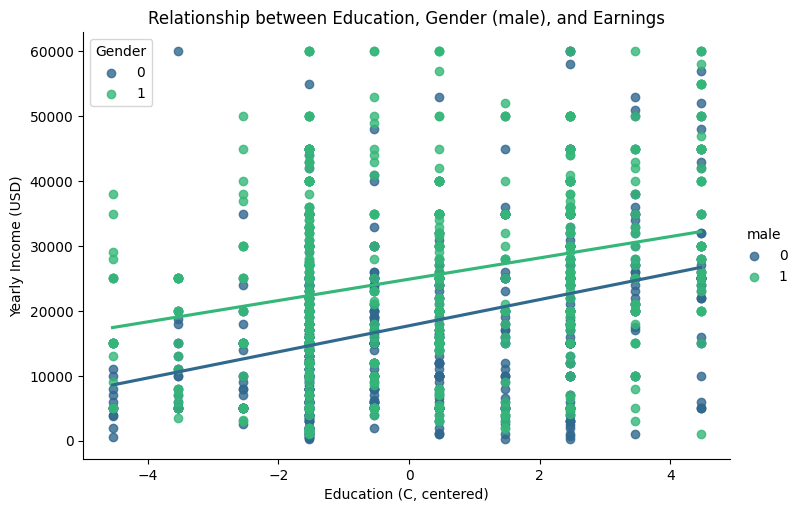

In [65]:
# Plotting the model_1

# Plot
plt.figure(figsize=(8, 6))
#sns.scatterplot(data=dataset, x='education', y='earn', hue='male', alpha=0.6)
sns.lmplot(data=dataset, x='education', y='earn', hue='male', ci=None, palette='viridis', aspect=1.5)

# Customize labels and title
plt.xlabel('Education (C, centered)')
plt.ylabel('Yearly Income (USD)')
plt.title('Relationship between Education, Gender (male), and Earnings')
plt.legend(title='Gender')

# Show plot
plt.show()

The more complex model that contains more parameters! (Model_2)

In [67]:
dataset.head()

,earn,height,weight,male,ethnicity,education,age,height_cm,weight_kg,education_male_interaction
0,50000.0,74,210.0,1,White,2.461856,2.965636,18.457333,95.254320,2.461856
1,60000.0,66,125.0,0,White,2.461856,15.965636,-1.862667,56.699000,0.000000
2,30000.0,64,126.0,0,White,2.461856,-13.034364,-6.942667,57.152592,0.000000
3,25000.0,65,200.0,0,White,3.461856,14.965636,-4.402667,90.718400,0.000000
4,50000.0,63,110.0,0,Other,2.461856,48.965636,-9.482667,49.895120,0.000000


In [68]:
# One-hot encode the ethnicity variable
dataset = pd.get_dummies(dataset, columns=['ethnicity'], drop_first=True)

In [69]:
dataset.head()

,earn,height,weight,male,education,age,height_cm,weight_kg,education_male_interaction,ethnicity_Hispanic,ethnicity_Other,ethnicity_White
0,50000.0,74,210.0,1,2.461856,2.965636,18.457333,95.254320,2.461856,False,False,True
1,60000.0,66,125.0,0,2.461856,15.965636,-1.862667,56.699000,0.000000,False,False,True
2,30000.0,64,126.0,0,2.461856,-13.034364,-6.942667,57.152592,0.000000,False,False,True
3,25000.0,65,200.0,0,3.461856,14.965636,-4.402667,90.718400,0.000000,False,False,True
4,50000.0,63,110.0,0,2.461856,48.965636,-9.482667,49.895120,0.000000,False,True,False


In [70]:
# Mean-center the weight_kg variable
dataset['weight_kg'] = dataset['weight_kg'] - dataset['weight_kg'].mean()

In [75]:
# Fit the more complex model
model_2 = ols('earn ~ height_cm  + ethnicity_Hispanic + ethnicity_Other + ethnicity_White + age + education + weight_kg + male', data=dataset).fit()

In [76]:
print(model_2.summary())

                            OLS Regression Results                            
Dep. Variable:                   earn   R-squared:                       0.196
Model:                            OLS   Adj. R-squared:                  0.192
Method:                 Least Squares   F-statistic:                     44.11
Date:                Tue, 10 Dec 2024   Prob (F-statistic):           1.35e-63
Time:                        13:49:38   Log-Likelihood:                -15688.
No. Observations:                1455   AIC:                         3.139e+04
Df Residuals:                    1446   BIC:                         3.144e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           